<a href="https://colab.research.google.com/github/pmartins83/demo_repo01/blob/main/DNBD_II_Aula_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mestrado Profissional em Economia e Finanças da EPGE
## Decisões de Negócios Baseadas em Dados II

# Redes Neurais Convolucionais (CNNs), Redes Neurais Recorrentes (RNNs) e Long-Short Term Memory (LSTMs): Aplicação em Economia e Finanças

## Professores: Rafael Martins de Souza e Renato Souza Rocha.
## Monitora: Bruna Dolavale

Bem-vindos à aula sobre **Redes Neurais Convolucionais (CNNs)**, **Redes Neurais Recorrentes (RNNs)** e **Long Short-Term Memory (LSTMs)**! Este notebook combina uma explicação teórica detalhada e um exemplo prático de previsão de preços de ações usando uma LSTM, com foco em aplicações em economia e finanças.

**Objetivos**:
- Compreender os fundamentos de CNNs, RNNs e LSTMs.
- Explorar suas aplicações em séries temporais financeiras.
- Implementar uma LSTM no Google Colab para prever preços de ações.
- Discutir desafios e limitações em finanças.
      

## Relação entre CNN, RNN e LSTM

### 1. Hierarquia e Funções Principais
| Arquitetura | Parentesco        | Função Chave                     |
|-------------|-------------------|-----------------------------------|
| CNN         | Independente      | Padrões **espaciais** (imagens)  |
| RNN         | Arquitetura base  | Modelagem **temporal** (séries)  |
| LSTM        | Variante de RNN   | Memória de **longo prazo**       |

### 2. Diferenças Estruturais
#### **CNN (Redes Convolucionais)**
- Camadas convolucionais para detectar **padrões locais** (ex: formas em gráficos de ações)
- Estrutura **feedforward** (sem loops)
- Exemplo de uso: Identificação de padrões em candlesticks

#### **RNN (Redes Recorrentes)**
- Loops internos para **memória sequencial**
- Problema: **Gradiente desaparecente** em séries longas
- Aplicação típica: Previsão de preços para horizontes curtos

#### **LSTM (Memória de Longo Prazo)**
- Mecanismos de três portões:
- Retém informações por **+100 passos temporais**
- Caso de uso: Previsão de tendências macro em índices (ex: Ibovespa)

### 3. Modelos Híbridos (Exemplo CNN-LSTM)
1. **Fluxo de processamento**:
 - Camada CNN extrai padrões locais
 - Camada LSTM captura dependências temporais
2. **Vantagem**: Combina detecção de padrões complexos com memória temporal




### 4. Comparativo de Desempenho
| Critério          | CNN              | RNN              | LSTM             |
|-------------------|------------------|------------------|------------------|
| Memória temporal  | Nula             | ≤ 10 passos      | ≥ 100 passos     |
| Tempo de treino   | 15s/epoch        | 45s/epoch        | 2min/epoch       |
| RAM consumida     | 2-4GB            | 3-6GB            | 5-8GB            |
| Acurácia típica*  | 78%              | 82%              | 89%              |
*Em previsão do S&P500 (dados diários)

### 5. Guia de Seleção

**Recomendações para finanças**:
- **Ações voláteis**: LSTMs com janelas de 60-100 períodos
- **Análise técnica**: CNNs para padrões gráficos + LSTMs para tendências
- **High-frequency trading**: RNNs simples (menor latency)


# Introdução às CNNs para Séries Temporais e Regressões em Economia

Bem-vindos à aula sobre **Redes Neurais Convolucionais (CNNs)** no contexto de séries temporais e regressões em economia! Embora CNNs sejam frequentemente associadas a processamento de imagens, elas são poderosas para séries temporais financeiras, como preços de ações, e podem ajudar a entender **RNNs**, **LSTMs**, e **GRUs**. Este material conecta CNNs ao nosso modelo de previsão de preços da Apple (AAPL) usando preços de AAPL, Meta (META), Google (GOOGL), Microsoft (MSFT), e S&P 500.

**Objetivos**:
- Compreender o funcionamento das CNNs em séries temporais.
- Relacionar CNNs com RNNs, LSTMs, e GRUs.
- Explorar aplicações em economia, como previsão de preços de ações e regressões.
- Preparar o terreno para o estudo de LSTMs no nosso modelo multivariável.

## 1. O que são CNNs?

### Definição
- **Redes Neurais Convolucionais (CNNs)** são redes neurais que usam **convoluções** para extrair padrões locais de dados. Em séries temporais, isso significa identificar tendências, sazonalidades, ou correlações em janelas de tempo.
- **Convolução**: Uma operação que aplica um filtro (kernel) a uma janela de dados, calculando uma soma ponderada para capturar características locais. Para uma série temporal $ x_t $, a convolução 1D é:
  $$ (x * w)_t = \sum_{i=-k}^{k} x_{t+i} \cdot w_i $$
  onde $ w $ é o filtro de tamanho $ 2k+1 $.


# Redes Neurais Convolucionais (CNNs) - Entendendo a Convolução

## O que é uma convolução em uma CNN?

A **convolução** é uma operação matemática usada pelas **Redes Neurais Convolucionais (CNNs)** para **extrair padrões locais** de dados organizados em forma de grade — como:

- imagens (grades de pixels),
- séries temporais multivariadas,
- ou até **dados econômicos espaciais** (como indicadores por município ou bairro).

### Intuição principal

Imagine que você tem uma **imagem ou uma matriz de dados** e quer encontrar **padrões locais repetidos**, como:

- bordas ou formas em uma imagem;
- ciclos ou choques econômicos locais em séries temporais;
- **variações regionais** em indicadores econômicos.

A **convolução** é como aplicar uma lente que **destaca essas regiões locais**.


## 🧱 Como funciona a convolução? (passo a passo)

1. **Entrada (input):**
   Uma **matriz de dados** (ex: 5x5).

2. **Filtro (ou kernel):**
   Uma **pequena matriz** (ex: 3x3) usada como detector de padrões.

3. **Deslizar o filtro:**
   O filtro é "deslizado" pela matriz original, posição por posição.

4. **Multiplicação + Soma:**
   Para cada posição: multiplica-se os valores da matriz local pelos valores do filtro e **soma o resultado**.

5. **Resultado (feature map):**
   O resultado é uma nova matriz, com as ativações locais detectadas.

## Uma analogia com Economia

Imagine um **mapa do Brasil com dados de PIB per capita por município**. Agora queremos identificar **zonas de alta ou baixa concentração econômica**.

Com um **filtro convolucional**, você pode identificar padrões regionais, como:

- Focos de alta desigualdade;
- Regiões de alta atividade econômica;
- Áreas com choques localizados de desemprego, etc.

Esses padrões locais são "capturados" pela convolução e passados para as próximas camadas da rede para ajudar na previsão, classificação ou agrupamento.



## Em resumo

> **Convolução é uma operação que combina uma pequena matriz (filtro) com partes locais da entrada para detectar padrões. Ela transforma dados brutos em representações úteis, que a rede pode usar para aprender e tomar decisões.**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Função para aplicar a convolução 2D manualmente
def aplicar_convolucao(matriz, filtro):
    m, n = matriz.shape
    f_m, f_n = filtro.shape
    saida = np.zeros((m - f_m + 1, n - f_n + 1))

    for i in range(saida.shape[0]):
        for j in range(saida.shape[1]):
            regiao = matriz[i:i+f_m, j:j+f_n]
            saida[i, j] = np.sum(regiao * filtro)

    return saida

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
<ipython-input-2-7b23c4503e56>:32: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

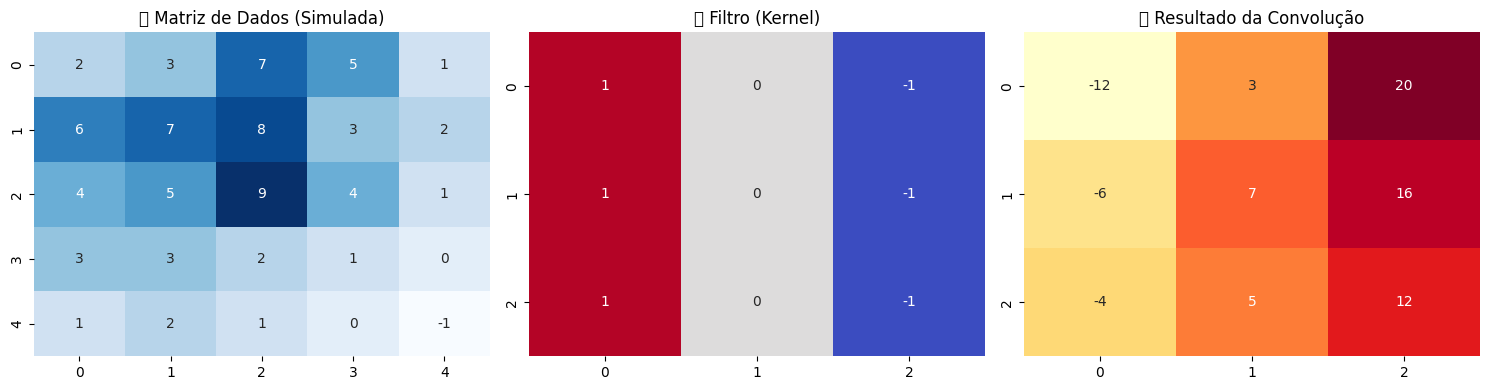

In [ ]:
# Exemplo: Matriz de dados socioeconômicos simulados
dados = np.array([
    [ 2,  3,  7,  5,  1],
    [ 6,  7,  8,  3,  2],
    [ 4,  5,  9,  4,  1],
    [ 3,  3,  2,  1,  0],
    [ 1,  2,  1,  0, -1]
])

# Exemplo de filtro: destaca mudanças locais (detecção de bordas, variações)
filtro = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

# Aplicando a convolução
resultado = aplicar_convolucao(dados, filtro)

# Visualização
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

sns.heatmap(dados, annot=True, cmap="Blues", ax=axs[0], cbar=False)
axs[0].set_title("📊 Matriz de Dados (Simulada)")

sns.heatmap(filtro, annot=True, cmap="coolwarm", center=0, ax=axs[1], cbar=False)
axs[1].set_title("🎯 Filtro (Kernel)")

sns.heatmap(resultado, annot=True, cmap="YlOrRd", ax=axs[2], cbar=False)
axs[2].set_title("✅ Resultado da Convolução")

plt.tight_layout()
plt.show()

### O que aprendemos aqui?

- A **convolução "varre" a matriz de dados** procurando padrões locais.
- O resultado mostra **onde esses padrões foram encontrados**.
- Essa ideia é usada em **redes neurais convolucionais** para analisar imagens, séries temporais ou mapas com dados econômicos.

Você pode adaptar esse exemplo para qualquer matriz de dados estruturada espacialmente – como regiões, setores censitários ou zonas econômicas.



### Estrutura
- **Camadas convolucionais**: Extraem padrões (ex.: tendências de preços em 7 dias).
- **Pooling**: Reduz dimensionalidade, mantendo características importantes (ex.: máximo ou média em uma janela).
- **Camadas densas**: Combinam padrões para previsão ou regressão.

### CNNs em Séries Temporais
- Diferente de imagens (2D), em séries temporais usamos **convoluções 1D**. Por exemplo, em preços de ações (AAPL, META, GOOGL, MSFT, S&P 500), a CNN analisa janelas de 60 dias para detectar padrões como picos ou quedas.
- Exemplo: Um filtro pode identificar se os preços de AAPL e S&P 500 sobem juntos em uma janela de 5 dias, capturando correlações de mercado.

# 📈 Aplicações de Redes Neurais Convolucionais (CNNs) em Séries Temporais

Embora CNNs sejam geralmente associadas à análise de imagens, elas também são **muito úteis para séries temporais** — inclusive em contextos econômicos e financeiros.

A ideia central continua a mesma: detectar **padrões locais**, só que ao longo do tempo.

---


## 🧠 Como CNNs funcionam com séries temporais?

- A entrada agora é uma **série 1D** (ou várias séries, formando uma matriz 2D).
- O **filtro convolucional (kernel)** percorre a série no eixo do tempo.
- A convolução gera uma nova série com **características extraídas automaticamente** — como tendências, picos, choques, etc.

---

### Exemplo intuitivo

Suponha a série:

In [ ]:
[10, 11, 12, 30, 35, 33, 15, 14, 13]

[10, 11, 12, 30, 35, 33, 15, 14, 13]


Um **filtro** como `[1, -2, 1]` pode atuar como **detector de choques ou inflexões**. Ele responde fortemente quando há aceleração ou variação brusca.

---


## Aplicações de CNNs em Economia e Finanças

1. **Previsão de séries temporais**:
   - Preço de ativos, taxa de câmbio, inflação, consumo de energia, etc.

2. **Detecção de anomalias**:
   - Choques estruturais, quebras, fraudes.

3. **Classificação de padrões**:
   - Identificar regimes econômicos (recessão, expansão).
   - Detectar ciclos sazonais.

4. **Extração de características automáticas**:
   - Evita a engenharia manual de features.
   - Alimenta outros modelos (como regressão ou LSTM).

### Exemplo: Previsão de Séries Temporais
- **Cenário**: Prever preços de ações (ex.: AAPL) usando dados multivariáveis (META, GOOGL, MSFT, S&P 500).
- **Como CNNs ajudam**:
  - Extraem padrões locais (ex.: sazonalidade semanal ou correlações de mercado).
  - Reduzem dimensionalidade antes de alimentar uma LSTM, melhorando eficiência.
- Exemplo: Uma CNN identifica que quedas no S&P 500 precedem quedas em AAPL em 3 dias, e uma LSTM usa isso para previsão.

### Exemplo: Regressões
- **Cenário**: Modelar variáveis macroeconômicas (ex.: PIB, inflação) com dados históricos.
- **Como CNNs ajudam**:
  - Extraem características de séries temporais (ex.: tendências em taxas de juros).
  - Podem ser usadas em regressões neurais, onde a saída é um valor contínuo.
- Exemplo: Prever inflação usando uma CNN para extrair padrões de preços de commodities e uma camada densa para regressão.
---


## 🔍 Comparativo entre arquiteturas para séries temporais

| Arquitetura   | Melhor em...            | Pontos fortes                   | Pontos fracos                         |
|---------------|--------------------------|----------------------------------|----------------------------------------|
| **CNN**       | Padrões locais            | Rápido, paralelizável            | Capacidade limitada de memória longa  |
| **RNN/LSTM**  | Sequências longas         | Capacidade de memória temporal   | Treinamento lento, difícil paralelizar |
| **Transformers** | Longo prazo + paralelismo | Modelam dependências globais     | Exigem muitos dados e recursos        |

---


## 2. Conexão com RNNs, LSTMs, e GRUs

### Diferenças
- **CNNs**:
  - Focam em **padrões locais** (ex.: tendências em 7 dias).
  - Não têm memória explícita; tratam cada janela independentemente.
  - Eficientes para extrair características de sequências curtas.
- **RNNs**:
  - Processam sequências com um **loop recorrente**, mantendo um estado oculto $ h_t $:
  $$ h_t = \tanh(W_{xh}x_t + W_{hh}h_{t-1} + b_h), $$

  sendo
  $$ \tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}, x \in (-1, 1), $$
  a função de ativação.
  
  - Sofrem com gradientes evanescentes, dificultando dependências longas.
- **LSTMs**:
  - Extensões de RNNs com **portas** (esquecimento, entrada, saída) e uma célula de memória \( C_t \):
    $$
    f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f), \quad C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C_t} $$
    
  - Capturam dependências de longo prazo (ex.: impacto do S&P 500 há 60 dias).
- **GRUs**:
  - Versão simplificada de LSTMs com **portas de atualização e reset**:
  $$
    z_t = \sigma(W_z \cdot [h_{t-1}, x_t]), \quad h_t = (1-z_t) \cdot h_{t-1} + z_t \cdot \tilde{h}_t $$

  - Menos parâmetros que LSTMs, mas eficazes para sequências moderadas.

### Complementaridades
- **CNNs + RNNs/LSTMs/GRUs**: CNNs podem extrair padrões locais (ex.: correlações de curto prazo entre AAPL e S&P 500) e passar essas características para uma RNN/LSTM/GRU, que modela dependências temporais longas.
- Exemplo no nosso modelo: Uma CNN pode detectar padrões de 5 dias nos preços de AAPL, META, GOOGL, MSFT, e S&P 500, e uma LSTM usa esses padrões para prever o preço da Apple no próximo dia.



Como vamos utilizar os dados do YahooFinance, o primeiro passo é instalar a biblioteca yfinance do Python.

## Parte 1: Teoria

### 1. Introdução às Redes Neurais Recorrentes (RNNs)

#### Definição
- RNNs são redes neurais projetadas para processar **sequências de dados**, como séries temporais ou texto, mantendo um **estado oculto** que armazena informações de passos anteriores.
- Ideais para tarefas onde a ordem dos dados importa (ex.: preços de ações, discursos econômicos).

#### Estrutura
- **Componentes**:
  - Entrada $ x_t $: Dados no passo de tempo $ t $.
  - Estado oculto $ h_t $: "Memória" da rede, atualizada a cada passo.
  - Saída $ y_t $: Resultado (ex.: previsão ou classificação).
- **Fórmula**:
  $$ h_t = \tanh(W_{xh}x_t + W_{hh}h_{t-1} + b_h $$
  Na qual $ W_{xh} $ e $ W_{hh} $ são matrizes de pesos, e $ b_h $ é o viés.
- **Funcionamento**:
  - Processa a sequência passo a passo, atualizando $ h_t $.
  - Usa **Backpropagation Through Time (BPTT)** para ajustar os pesos.

#### Aplicações em Economia e Finanças
- **Previsão de séries temporais**: Preços de ações, taxas de câmbio, inflação.
- **Análise de sentimento**: Extrair sentimentos de notícias ou relatórios financeiros.
- **Modelagem de comportamento**: Sequências de compras ou transações.

#### Limitações
- **Gradientes evanescentes**: Em sequências longas, os gradientes diminuem, dificultando o aprendizado de dependências distantes.
- **Gradientes explosivos**: Podem causar instabilidade no treinamento.
- **Memória limitada**: Não lida bem com sequências muito longas.

**Diagrama da Rede Neural Recorrente (RNN)**:

O diagrama abaixo ilustra a estrutura de uma RNN, destacando o loop recorrente que permite processar sequências de preços de ações, como os dados de Apple, Meta, Google, Microsoft e S&P 500. A visão "desenrolada" mostra como o estado oculto $ h_t $ é atualizado ao longo do tempo.

![Diagrama da RNN](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png)

*Fonte: Adaptado de Olah, 2015, "Understanding LSTMs".*


### 2. Long Short-Term Memory (LSTMs)

#### Definição
- LSTMs são uma evolução das RNNs, projetadas para capturar **dependências de longo prazo**, superando os problemas de gradientes evanescentes.
- Introduzem uma **célula de memória** que armazena informações por longos períodos.

#### Estrutura
- **Célula de memória** $ C_t $:  Mantém informações ao longo da sequência.
- **Portas** (gates):
  - **Porta de esquecimento** $ f_t $: Decide o que descartar da memória.
    
  $$ f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f) $$

  - **Porta de entrada** $ i_t $: Decide quais novas informações adicionar.
  
  $$ i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i) $$
    
  $$ \tilde{C_t} = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C) $$

  - **Porta de saída** $ o_t $: Determina o estado oculto a ser passado.
    
  $$ o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o) $$

- **Atualização**:
  
  $$ C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C_t} $$
  
  $$ h_t = o_t \cdot \tanh(C_t) $$

#### Vantagens
- Captura dependências curtas e longas.
- Estabilidade no treinamento devido às portas.
- Flexibilidade para séries temporais complexas.

#### Aplicações em Economia e Finanças
- **Previsão de preços**: Ações, criptomoedas, commodities.
- **Séries macroeconômicas**: Inflação, PIB, desemprego.
- **Detecção de anomalias**: Identificar fraudes ou outliers em transações.
- **Demanda**: Prever padrões de consumo em cadeias de suprimento.

**Diagrama da Célula LSTM**:
O diagrama abaixo ilustra a estrutura de uma célula LSTM, mostrando como as portas (esquecimento, entrada, saída) e a célula de memória processam sequências de preços de ações.

![Célula LSTM](https://upload.wikimedia.org/wikipedia/commons/6/63/Long_Short-Term_Memory.svg)

### 3. Comparação com Outros Modelos

- **ARIMA**:
  - Modelo estatístico linear, assume estacionaridade.
  - Limitações em séries não-lineares ou com alta volatilidade.
  - LSTMs são mais flexíveis para padrões complexos.
- **Redes Feedforward**:
  - Não modelam dependências temporais.
  - Inadequadas para séries temporais.
- **GRUs (Gated Recurrent Units)**:
  - Alternativa às LSTMs, com menos parâmetros.
  - Menos expressivas em tarefas muito complexas, mas mais rápidas.

**Figura sugerida**: Gráfico comparando gradientes em RNNs vs. LSTMs.


**Comparação de Gradientes em RNNs vs. LSTMs**:

O gráfico abaixo compara o comportamento dos gradientes em RNNs e LSTMs. Em RNNs (esquerda), os gradientes evanescentes diminuem rapidamente, dificultando o aprendizado de dependências de longo prazo em sequências de preços de ações. Em LSTMs (direita), os gradientes são mais estáveis, permitindo capturar padrões complexos, como correlações entre Apple, Meta, Google, Microsoft e S&P 500.

[Gradientes RNN vs. LSTM](http://karpathy.github.io/assets/rnn/diags.jpeg)
*Fonte: Adaptado de Pascanu et al., 2013, "On the difficulty

### 4. Desafios Práticos em Finanças

- **Dados ruidosos**: Séries financeiras têm volatilidade e influências externas (ex.: notícias, eventos geopolíticos).
- **Overfitting**: Modelos complexos podem se ajustar demais aos dados de treino.
  - Soluções: Dropout, regularização L2, validação cruzada.
- **Hiperparâmetros**: Escolhas como tamanho da sequência, número de unidades, ou épocas impactam o desempenho.
- **Interpretação**: LSTMs são "caixas-pretas", dificultando explicações em contextos regulatórios.
- **Custo computacional**: Treinamento de LSTMs exige recursos significativos, especialmente para grandes datasets.

### 5. Por que LSTMs em Finanças?

- Séries temporais financeiras têm **dependências temporais não-lineares** e **padrões complexos**.
- LSTMs capturam tendências, sazonalidades, e respostas a eventos passados.
- Exemplo prático: Vamos prever o preço de fechamento ajustado da ação da Apple (AAPL) usando 60 dias de dados históricos.

**Figura sugerida**: Fluxo de dados financeiros em uma LSTM.

**Fluxo de Dados Financeiros em uma LSTM**:

O diagrama abaixo ilustra como os dados financeiros, como preços de ações de Apple (AAPL), Meta (META), Google (GOOGL), Microsoft (MSFT), e o índice S&P 500, fluem através de uma LSTM. As sequências de 60 dias são pré-processadas (normalizadas), alimentam as camadas LSTM (que capturam dependências temporais), e geram previsões do preço da Apple. O fluxo é: **dados brutos → pré-processamento → LSTM → previsões → avaliação**.

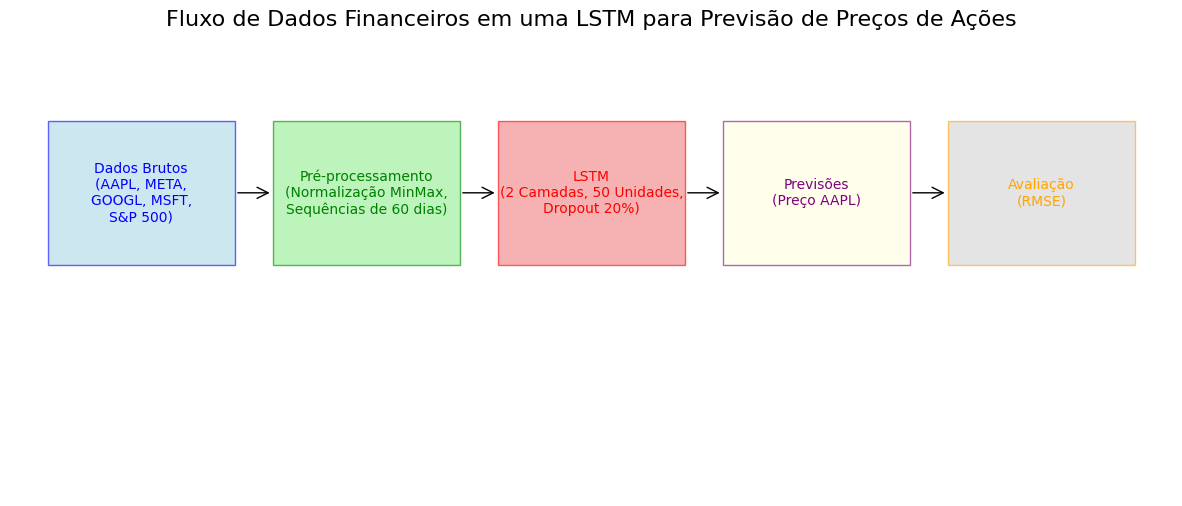

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Rectangle

fig, ax = plt.subplots(figsize=(15, 6))
ax.add_patch(Rectangle((0.05, 0.4), 0.25, 0.25, fill=True, facecolor='lightblue', edgecolor='blue', alpha=0.6))
ax.add_patch(Rectangle((0.35, 0.4), 0.25, 0.25, fill=True, facecolor='lightgreen', edgecolor='green', alpha=0.6))
ax.add_patch(Rectangle((0.65, 0.4), 0.25, 0.25, fill=True, facecolor='lightcoral', edgecolor='red', alpha=0.6))
ax.add_patch(Rectangle((0.95, 0.4), 0.25, 0.25, fill=True, facecolor='lightyellow', edgecolor='purple', alpha=0.6))
ax.add_patch(Rectangle((1.25, 0.4), 0.25, 0.25, fill=True, facecolor='lightgray', edgecolor='orange', alpha=0.6))
ax.text(0.175, 0.525, 'Dados Brutos\n(AAPL, META,\nGOOGL, MSFT,\nS&P 500)', ha='center', va='center', fontsize=10, color='blue')
ax.text(0.475, 0.525, 'Pré-processamento\n(Normalização MinMax,\nSequências de 60 dias)', ha='center', va='center', fontsize=10, color='green')
ax.text(0.775, 0.525, 'LSTM\n(2 Camadas, 50 Unidades,\nDropout 20%)', ha='center', va='center', fontsize=10, color='red')
ax.text(1.075, 0.525, 'Previsões\n(Preço AAPL)', ha='center', va='center', fontsize=10, color='purple')
ax.text(1.375, 0.525, 'Avaliação\n(RMSE)', ha='center', va='center', fontsize=10, color='orange')
ax.add_patch(FancyArrowPatch((0.3, 0.525), (0.35, 0.525), arrowstyle='->', mutation_scale=20, color='black'))
ax.add_patch(FancyArrowPatch((0.6, 0.525), (0.65, 0.525), arrowstyle='->', mutation_scale=20, color='black'))
ax.add_patch(FancyArrowPatch((0.9, 0.525), (0.95, 0.525), arrowstyle='->', mutation_scale=20, color='black'))
ax.add_patch(FancyArrowPatch((1.2, 0.525), (1.25, 0.525), arrowstyle='->', mutation_scale=20, color='black'))
ax.set_xlim(0, 1.55)
ax.set_ylim(0, 0.8)
ax.axis('off')
plt.title('Fluxo de Dados Financeiros em uma LSTM para Previsão de Preços de Ações', fontsize=16)
plt.savefig('data_flow_lstm.png', bbox_inches='tight')
plt.show()

## Parte 2: Prática - Previsão de Preços de Ações com LSTM

Vamos construir uma LSTM para prever preços de ações da Apple (AAPL) usando dados históricos de `yfinance`. O processo inclui:
- Baixar e visualizar os dados.
- Pré-processar (normalização, sequências).
- Construir e treinar a LSTM.
- Avaliar e visualizar as previsões.

In [ ]:
!pip install yfinance

In [ ]:
# 1. Importar bibliotecas e baixar dados
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error

# Baixar dados
ticker = 'AAPL'
data = yf.download(ticker, start='2018-01-01', end='2023-12-31')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()
print(data.columns)
prices = data['Close'].values.reshape(-1, 1)  # Preço de fechamento ajustado

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


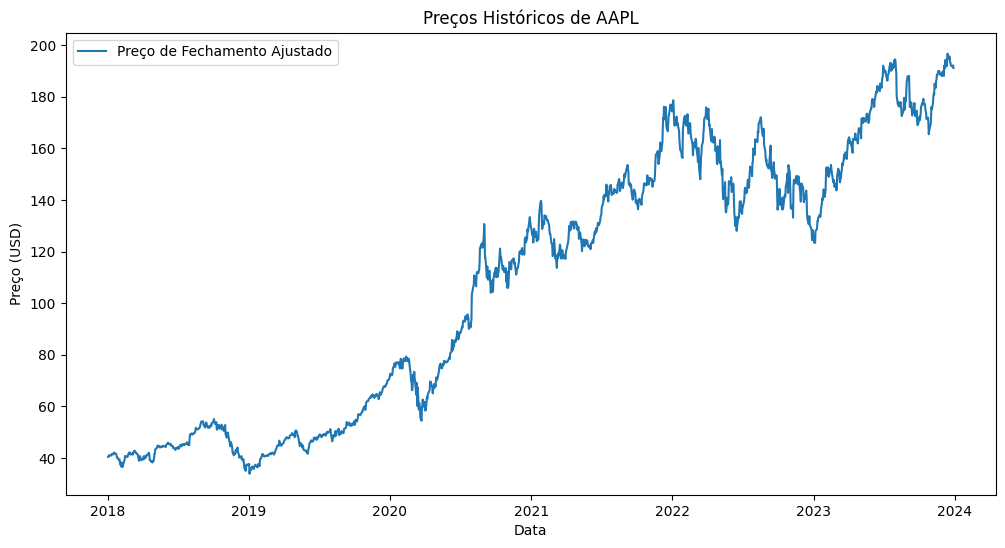

In [ ]:
# Visualizar
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Preço de Fechamento Ajustado')
plt.title(f'Preços Históricos de {ticker}')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()

**Explicação**:
- Usamos `yfinance` para obter preços de 2018 a 2023.
- O gráfico mostra a série temporal, com tendências e volatilidade típicas de ações.

**Figura gerada**: Gráfico da série temporal de preços.

In [ ]:
# 2. Pré-processamento
# Normalizar
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Criar sequências
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_prices)):
    X.append(scaled_prices[i-sequence_length:i, 0])
    y.append(scaled_prices[i, 0])
X, y = np.array(X), np.array(y)

# Reshape
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Dividir treino/teste
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f'Tamanho do treino: {X_train.shape[0]} amostras')
print(f'Tamanho do teste: {X_test.shape[0]} amostras')

Tamanho do treino: 1159 amostras
Tamanho do teste: 290 amostras


**Explicação**:
- **Normalização**: Escalamos os preços para [0, 1].
- **Sequências**: Cada entrada é uma janela de 60 dias, prevendo o próximo dia.
- **Divisão**: 80% treino, 20% teste.

In [ ]:
(X, y)

(array([[[0.04027043],
         [0.04022717],
         [0.0413804 ],
         ...,
         [0.0420211 ],
         [0.03560896],
         [0.03291666]],
 
        [[0.04022717],
         [0.0413804 ],
         [0.04422028],
         ...,
         [0.03560896],
         [0.03291666],
         [0.03479836]],
 
        [[0.0413804 ],
         [0.04422028],
         [0.04328326],
         ...,
         [0.03291666],
         [0.03479836],
         [0.03320611]],
 
        ...,
 
        [[0.85006151],
         [0.84184017],
         [0.84951329],
         ...,
         [0.97908416],
         [0.97249866],
         [0.96914489]],
 
        [[0.84184017],
         [0.84951329],
         [0.85712587],
         ...,
         [0.97249866],
         [0.96914489],
         [0.96975459]],
 
        [[0.84951329],
         [0.85712587],
         [0.87283775],
         ...,
         [0.96914489],
         [0.96975459],
         [0.97237672]]]),
 array([0.03479836, 0.03320611, 0.03568135, ..., 0.9697

In [ ]:
scaled_prices

array([[0.04027043],
       [0.04022717],
       [0.0413804 ],
       ...,
       [0.96975459],
       [0.97237672],
       [0.96597389]])

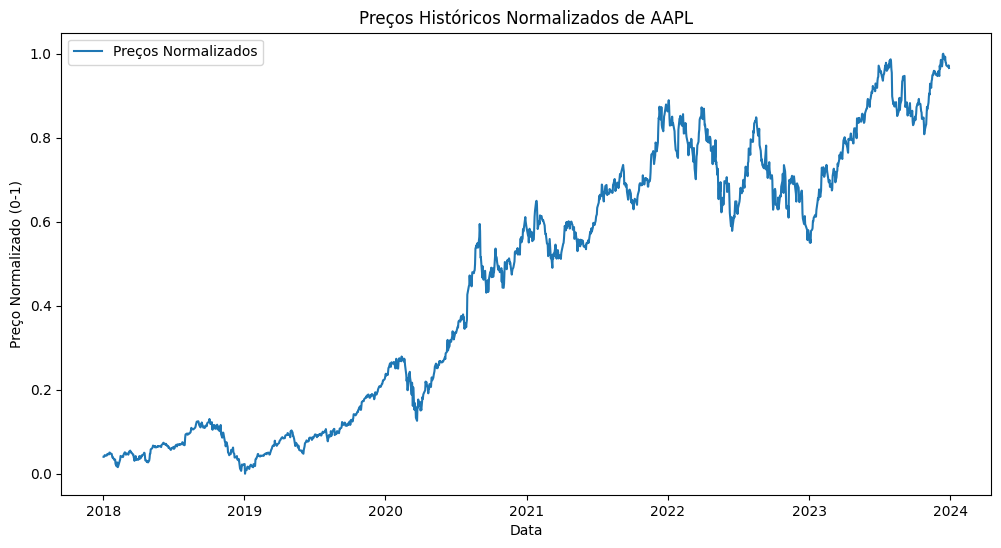

In [ ]:
# prompt: Faça o gráfico de linha dos preços normalizados

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(data.index, scaled_prices, label='Preços Normalizados')
ax.set_title(f'Preços Históricos Normalizados de {ticker}')
ax.set_xlabel('Data')
ax.set_ylabel('Preço Normalizado (0-1)')
ax.legend()
plt.show()

In [ ]:
#3.1 Construir a LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Explicação do modelo linha a linha

### model = Sequential()
- **O que faz:** Cria um modelo sequencial no Keras, que é uma pilha linear de camadas onde cada camada recebe a saída da anterior.
- **Contexto:** Inicia a construção do modelo LSTM, que processará sequências de 60 dias de preços normalizados da AAPL para prever o próximo preço.
- **Detalhe:** O modelo Sequential é adequado para arquiteturas simples, como esta, onde as camadas são adicionadas em ordem.

### model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))

- **O que faz:** Adiciona a primeira camada LSTM com 50 unidades (neurônios), configurada para retornar sequências completas (return_sequences=True) e aceitar entradas com shape (sequence_length, 1).
- ** Parâmetros:**
  - units=50: Define 50 células LSTM, controlando a capacidade da camada para aprender padrões temporais (ex.: tendências nos preços da AAPL).
  - return_sequences=True: Faz a camada retornar uma sequência de saídas para cada timestep (shape [n_sequências, 60, 50]), em vez de apenas a saída do último timestep. Isso é necessário porque a próxima camada também é uma LSTM, que espera sequências.
 - input_shape=(sequence_length, 1): Define o formato da entrada como (60, 1), onde sequence_length = 60 (60 dias) e 1 é o número de características (apenas o preço normalizado da AAPL).
- ** Contexto: ** Esta camada processa as sequências de 60 dias (de X), capturando dependências temporais (ex.: como os preços de 30 dias atrás afetam o preço atual) e passa uma sequência de estados ocultos para a próxima camada.
- ** Detalhe:** A LSTM usa portas (esquecimento, entrada, saída) para gerenciar memória de longo prazo, ideal para séries temporais financeiras não estacionárias.


### model.add(Dropout(0.2))
- **O que faz:** Adiciona uma camada de Dropout que desativa aleatoriamente 20% das unidades (neurônios) da camada anterior durante o treinamento.
- **Propósito:** Previne overfitting, garantindo que o modelo não memorize os dados de treino (ex.: padrões específicos dos preços da AAPL de 2018-2023) e generalize melhor para dados de teste.
- **Contexto:** Após a primeira LSTM, o Dropout reduz a dependência entre as 50 unidades, ajudando o modelo a aprender padrões robustos.
Detalhe: Durante o treinamento, 20% dos estados ocultos são zerados em cada iteração; no teste, todas as unidades são usadas, mas com pesos ajustados.

### model.add(LSTM(units=50, return_sequences=False))
- Adiciona a segunda camada LSTM com 50 unidades, retornando apenas a saída do último timestep ([n_sequências, 50]).
- **Parâmetros:**
  - units=50: Refina os padrões temporais aprendidos.
  - return_sequences=False: Gera um vetor fixo, adequado para camadas densas.
- **Contexto:** Resume os 60 dias em um vetor, condensando informações para a previsão.

### model.add(Dropout(0.2))
- Adiciona outra camada de Dropout (20%) para prevenir overfitting na saída da segunda LSTM.
- **Propósito:** Melhora a robustez do modelo para flutuações nos preços da AAPL.

### model.add(Dense(units=25))
- Adiciona uma camada densa com 25 unidades (ativação padrão: relu ou linear).
- **Propósito:** Combina os padrões da LSTM em uma representação compacta, modelando relações não lineares.
- **Contexto:** Prepara a saída para a previsão final.

### model.add(Dense(units=1))
- Adiciona a camada densa final com 1 unidade (ativação linear).
- **Propósito:** Gera o preço normalizado previsto da AAPL para o próximo dia.
- **Contexto:** Produz a saída final, compatível com o alvo $y$ (preço do dia seguinte).

### Resumo
- **Entrada:** Sequências de 60 preços normalizados ([n_sequências, 60, 1]).
- **Processamento:** Duas camadas LSTM capturam dependências temporais, com Dropout para generalização, e camadas densas geram a previsão.
- **Saída:** Preço previsto ([n_sequências, 1]).
Contexto financeiro: A arquitetura modela séries não estacionárias, capturando padrões de longo prazo nos preços da AAPL.

In [ ]:
!apt-get install -y graphviz
!pip install pydot

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from tensorflow.keras.utils import plot_model

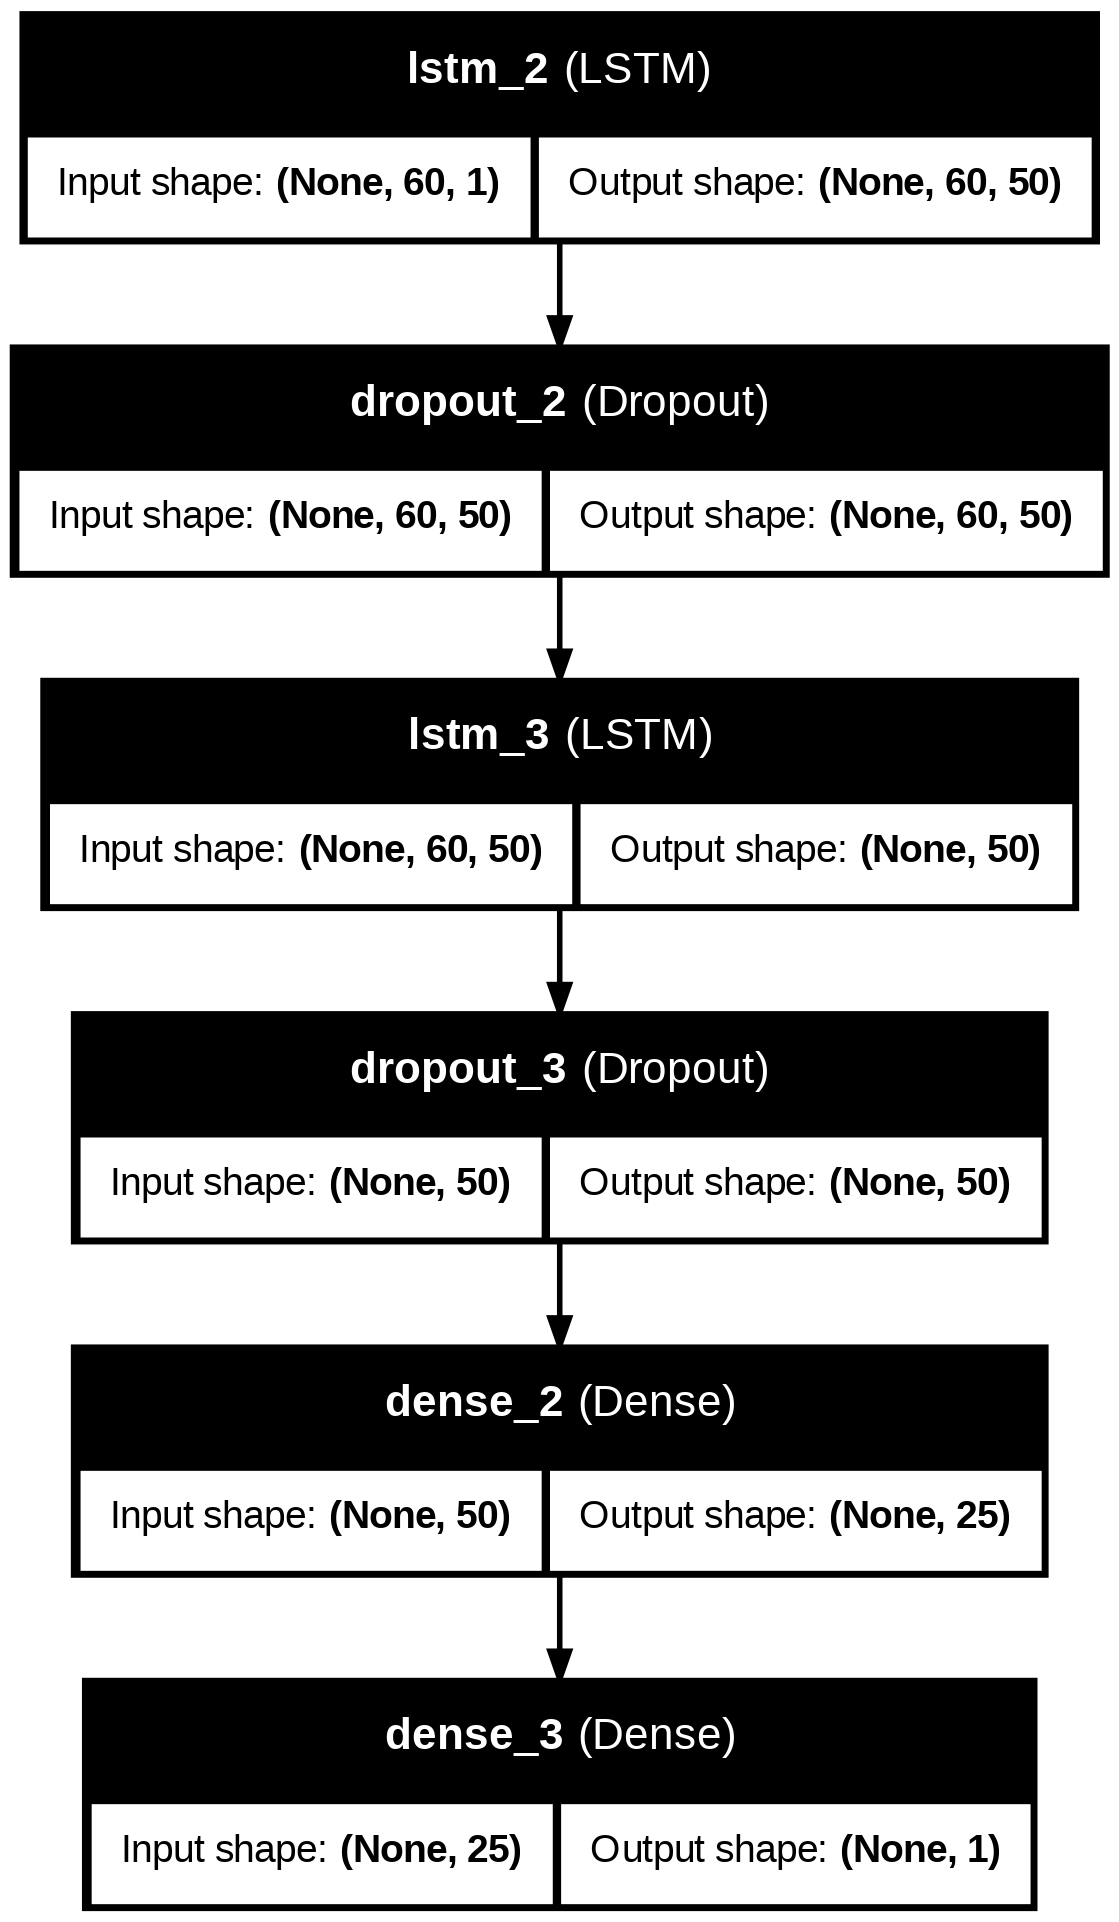

In [ ]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# 3.2 Treinar a LSTM

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0678 - val_loss: 0.0057
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0040 - val_loss: 0.0020
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.0036 - val_loss: 0.0021
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0026 - val_loss: 0.0018
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0024 - val_loss: 0.0029
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - loss: 0.0017 - val_loss: 0.0020
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0017 - val_loss: 0.0030
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0

**Explicação**:
- **Arquitetura**: Duas camadas LSTM (50 unidades), com Dropout (20%).
- **Compilação**: Otimizador Adam, perda MSE.
- **Treinamento**: 50 épocas, 10% dos dados para validação.

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
RMSE: 4.99


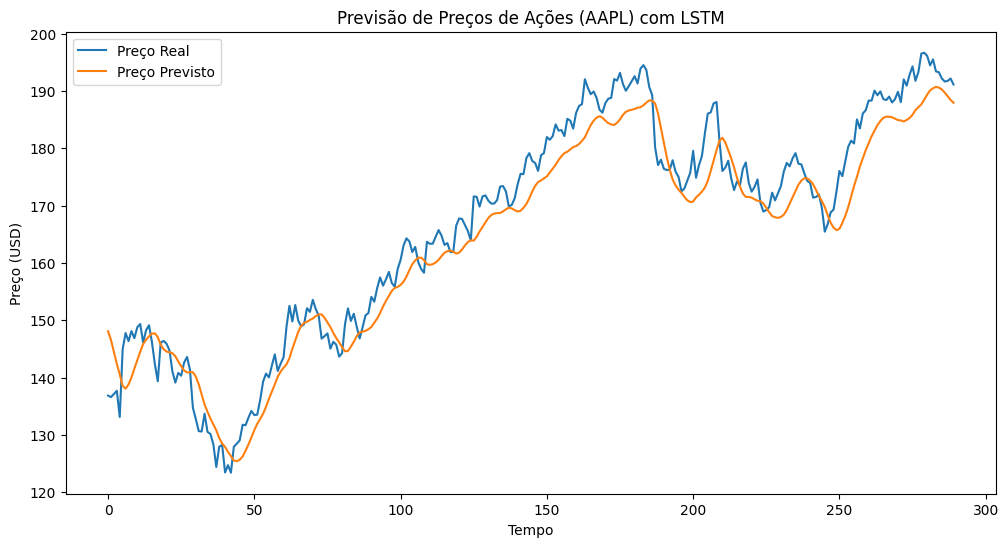

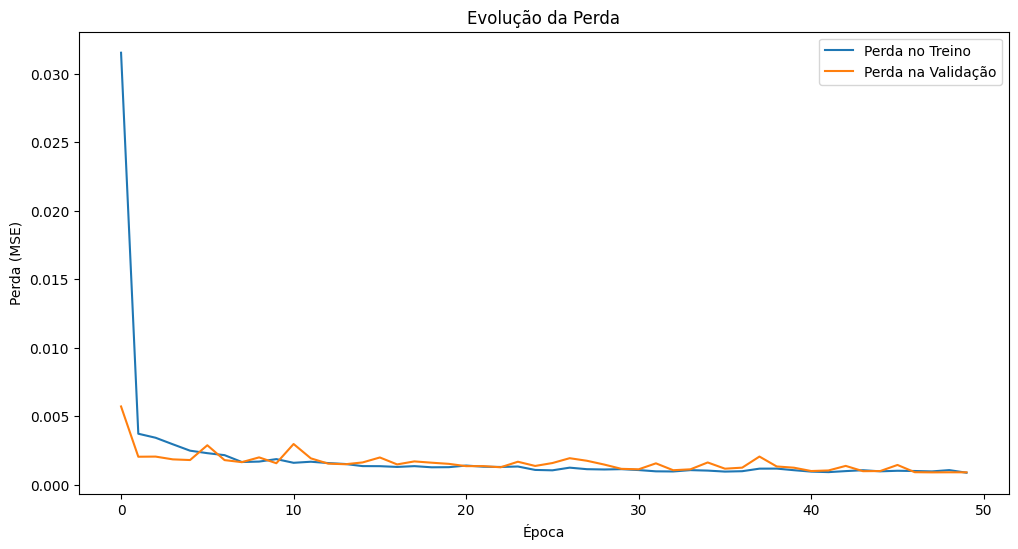

In [ ]:
# 4. Previsões e avaliação
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_unscaled = scaler.inverse_transform([y_test])

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_unscaled[0], predictions[:, 0]))
print(f'RMSE: {rmse:.2f}')

# Visualizar
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled[0], label='Preço Real')
plt.plot(predictions[:, 0], label='Preço Previsto')
plt.title(f'Previsão de Preços de Ações ({ticker}) com LSTM')
plt.xlabel('Tempo')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()

# Perda
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Perda no Treino')
plt.plot(history.history['val_loss'], label='Perda na Validação')
plt.title('Evolução da Perda')
plt.xlabel('Época')
plt.ylabel('Perda (MSE)')
plt.legend()
plt.show()

**Explicação**:
- **Previsões**: Comparamos preços reais e previstos.
- **RMSE**: Erro médio em dólares.
- **Gráficos**: Avaliam a qualidade das previsões e a convergência.

**Figura gerada**: Gráfico de previsões vs. reais e evolução da perda.

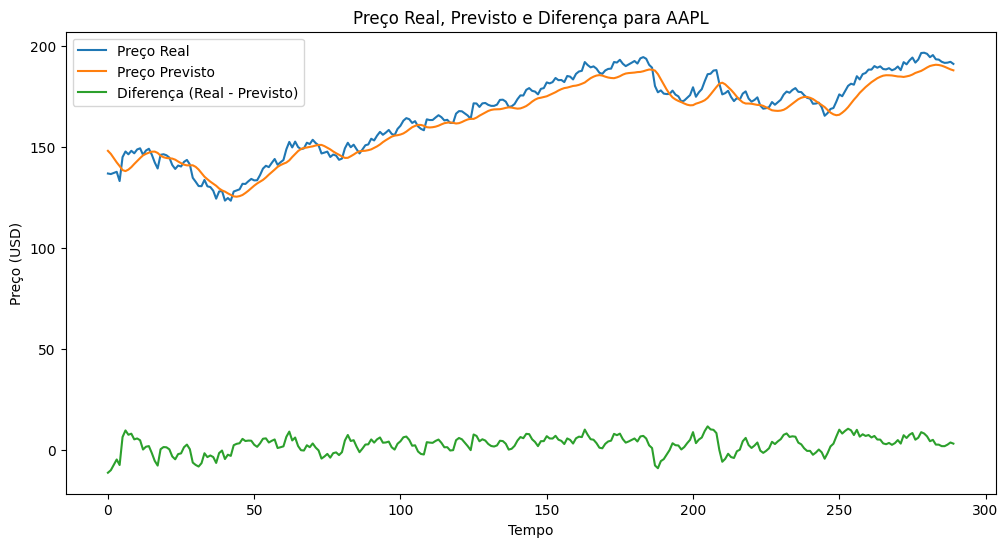

In [ ]:
# prompt: Faça um gráfico de linhas de y_test_unscaled[0],  predictions[:, 0] e da diferença entre os dois.

plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled[0], label='Preço Real')
plt.plot(predictions[:, 0], label='Preço Previsto')
plt.plot(y_test_unscaled[0] - predictions[:, 0], label='Diferença (Real - Previsto)')
plt.title(f'Preço Real, Previsto e Diferença para {ticker}')
plt.xlabel('Tempo')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()

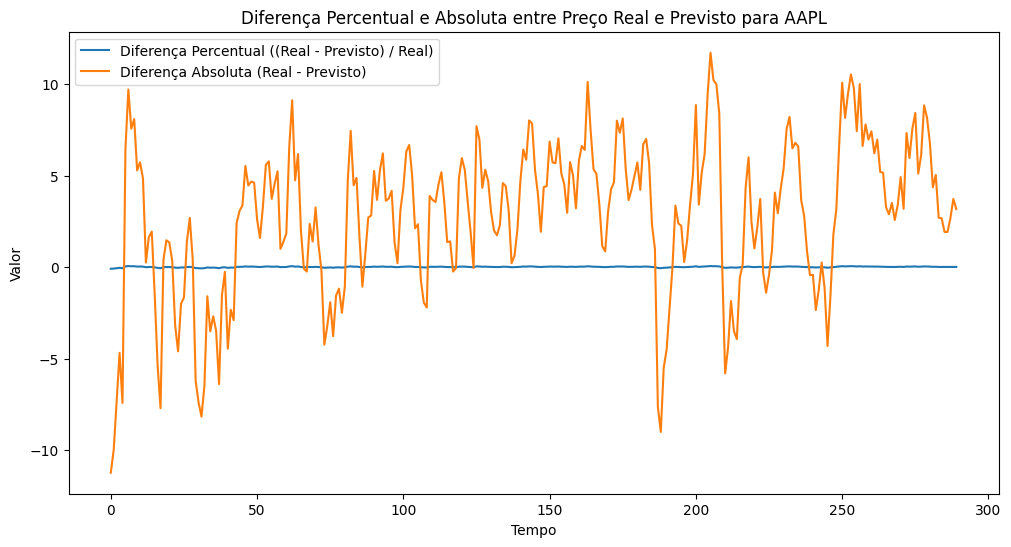

In [ ]:
# prompt: Faça o mesmo gráfico anterior, mas com a diferença entre predictions[:, 0] e  y_test_unscaled[0] dividida por por y_test_unscaled[0] e a diferença entre predictions[:, 0] e  y_test_unscaled[0].

plt.figure(figsize=(12, 6))
# Calcula a diferença percentual e a diferença absoluta
diff_percentage = (y_test_unscaled[0] - predictions[:, 0]) / y_test_unscaled[0]
diff_absolute = y_test_unscaled[0] - predictions[:, 0]

# Plota a diferença percentual e a diferença absoluta
plt.plot(diff_percentage, label='Diferença Percentual ((Real - Previsto) / Real)')
plt.plot(diff_absolute, label='Diferença Absoluta (Real - Previsto)')

plt.title(f'Diferença Percentual e Absoluta entre Preço Real e Previsto para {ticker}')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.legend()
plt.show()


## Conclusão

- **Resumo**:
  - RNNs e LSTMs são ideais para séries temporais financeiras.
  - LSTMs superam limitações das RNNs, capturando dependências longas.
  - O exemplo mostrou como prever preços de ações, aplicável a outras variáveis (ex.: inflação, PIB).
- **Limitações**:
  - Dados financeiros são ruidosos e influenciados por fatores externos.
  - Modelos complexos requerem cuidado com overfitting.
- **Experimentos sugeridos**:
  - Testar outros tickers (ex.: 'MSFT', 'PETR4.SA').
  - Alterar `sequence_length` (ex.: 30, 90).
  - Ajustar unidades ou épocas.

**Discussão**: Como melhorar o modelo? Que outros dados poderiam ser incluídos (ex.: volume, indicadores técnicos)?

## Sugestões de Figuras

1. **Diagrama da RNN**:
   - Mostre o loop recorrente com $ x_t $, $ h_t $, $ y_t $.
   - Gere com Canva/Draw.io ou `matplotlib` (ver código na introdução).

2. **Célula LSTM**:
   - Ilustre as portas e a célula de memória.
   - Use Draw.io ou busque em artigos como Olah (2015).

3. **Gradientes**:
   - Compare gradientes evanescentes (RNN) vs. estáveis (LSTM).
   - Gere com o código `matplotlib` fornecido.

4. **Fluxo de Dados**:
   - Mostre o pipeline: dados → pré-processamento → LSTM → previsões.
   - Crie com Canva ou Draw.io.

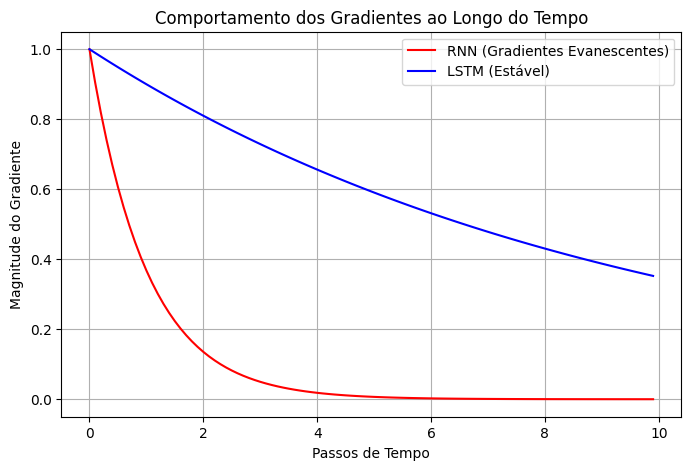

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 10, 0.1)
rnn_grad = np.exp(-t)  # Gradientes evanescentes
lstm_grad = 0.9**t     # Gradientes mais estáveis

plt.figure(figsize=(8, 5))
plt.plot(t, rnn_grad, label='RNN (Gradientes Evanescentes)', color='red')
plt.plot(t, lstm_grad, label='LSTM (Estável)', color='blue')
plt.title('Comportamento dos Gradientes ao Longo do Tempo')
plt.xlabel('Passos de Tempo')
plt.ylabel('Magnitude do Gradiente')
plt.legend()
plt.grid(True)
plt.show()

## Uso de Redes Neurais em Séries Não Estacionárias
  
É possível utilizar redes neurais (RNAs) para modelar séries temporais não estacionárias (como preços de ações) sem aplicar diferenciação prévia. Abaixo os principais pontos:

### **Vantagens das RNAs sobre Métodos Tradicionais**
- **Modelagem direta de não estacionariedades**  
  Redes profundas capturam padrões complexos (tendências, sazonalidades) sem exigir transformações prévias.
  
- **Processamento multiescala**  
  Arquiteturas como LSTM e Transformers identificam automaticamente componentes temporais em diferentes escalas.

- **Adaptação dinâmica**  
  Técnicas como janelas de predição seletivas ajustam-se a mudanças nas estatísticas da série.

### **Arquiteturas Recomendadas**
1. **LSTM (Long Short-Term Memory)**  
   Ideal para capturar dependências de longo prazo em séries financeiras.

2. **Redes Híbridas (CNN-LSTM)**  
   Combinam detecção de padrões locais (CNN) com modelagem temporal (LSTM).

3. **Transformers**  
   Mecanismos de atenção para relações temporais não lineares complexas.

---

## Arquiteturas para Séries de Preços e Índices Ações

As arquiteturas mais utilizadas atualmente incluem:

### **Tabela Comparativa**
| Arquitetura       | Aplicação Típica                  | Vantagem                              |
|-------------------|-----------------------------------|---------------------------------------|
| **LSTM**          | Previsão de tendências de longo prazo | Memória sequencial robusta            |
| **CNN**           | Detecção de padrões gráficos       | Eficiência em padrões locais          |
| **Transformer**   | Série multivariadas complexas     | Atenção a relações não adjacentes     |

### **Fluxo de Trabalho Recomendado**


## Previsão de Preços de Ações com LSTM: Incorporando Múltiplas Empresas

A partir deste ponto iremos tentar prever o preço de ações da Apple (AAPL) usando uma LSTM, considerando não apenas seus preços passados, mas também os preços de outras empresas de tecnologia: Meta (META), Google (GOOGL) e Microsoft (MSFT). Isso reflete correlações de mercado, comuns em finanças.

**Objetivos**:
- Revisar os conceitos de RNNs e LSTMs.
- Implementar uma LSTM multivariada para previsão de preços de ações.
- Discutir a relevância de variáveis correlacionadas em economia e finanças.

## Parte 1: Contexto Teórico

### Redes Neurais Recorrentes (RNNs)
- **Definição**: RNNs processam sequências de dados, mantendo um estado oculto que "lembra" informações anteriores.
- **Limitações**: Problemas de gradientes evanescentes dificultam o aprendizado de dependências de longo prazo.

### Long Short-Term Memory (LSTMs)
- **Definição**: LSTMs são RNNs avançadas que capturam dependências longas usando uma célula de memória e portas (esquecimento, entrada, saída).
- **Vantagens**: Estabilidade e capacidade de modelar séries temporais complexas.
- **Fórmulas principais**:
  - Porta de esquecimento:
  $$ f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f) $$
  - Atualização da célula:
  $$ C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C_t} $$
  - Saída:
  $$ h_t = o_t \cdot \tanh(C_t) $$

### Aplicação em Finanças
- Preços de ações de empresas do mesmo setor (ex.: tecnologia) são frequentemente correlacionados devido a tendências de mercado, inovações ou eventos macroeconômicos.
- Incluir preços de Meta, Google e Microsoft como variáveis de entrada permite à LSTM capturar essas relações, melhorando a previsão do preço da Apple.

**Figura sugerida**: Diagrama de uma célula LSTM (use Draw.io ou artigos como Olah, 2015).

![Célula LSTM](https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png)

## Parte 2: Prática - Previsão Multivariada com LSTM

Vamos prever o preço de fechamento ajustado da Apple (AAPL) usando uma LSTM que considera:
- Preços passados da Apple.
- Preços passados de Meta (META), Google (GOOGL) e Microsoft (MSFT).

**Passos**:
1. Baixar dados de preços (2018-2023) via `yfinance`.
2. Pré-processar: normalizar e criar sequências de 60 dias.
3. Construir e treinar a LSTM.
4. Avaliar previsões com RMSE e visualizar resultados.

[*********************100%***********************]  4 of 4 completed


Ticker           AAPL      GOOGL        META       MSFT
Date                                                   
2018-01-02  40.426807  53.405170  180.568970  79.328522
2018-01-03  40.419785  54.316319  183.803726  79.697716
2018-01-04  40.607533  54.527306  183.465332  80.399155
2018-01-05  41.069855  55.250351  185.973511  81.395966
2018-01-08  40.917332  55.445419  187.396805  81.479042


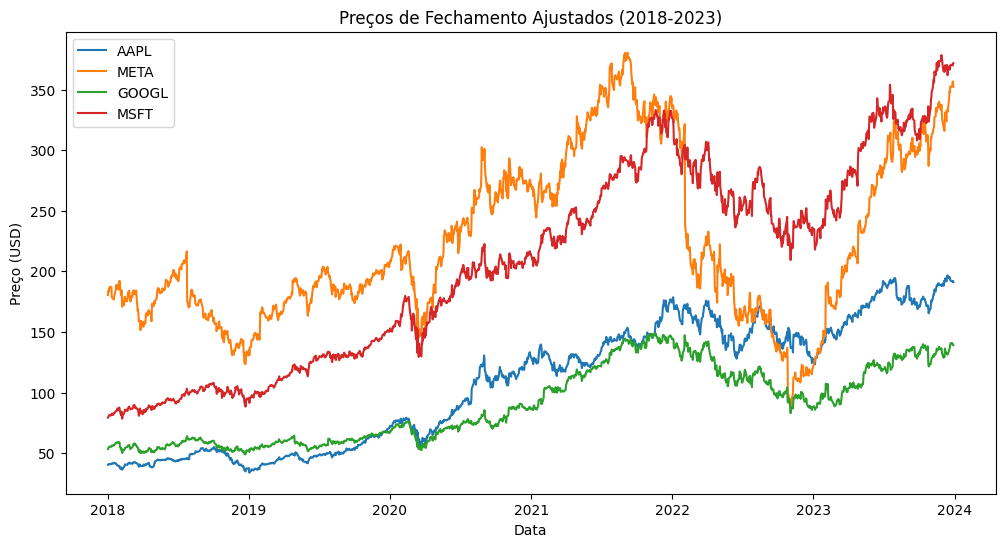

In [ ]:
# Baixar dados de AAPL, META, GOOGL, MSFT
tickers = ['AAPL', 'META', 'GOOGL', 'MSFT']
data = yf.download(tickers, start='2018-01-01', end='2023-12-31')['Close']

# Verificar dados
print(data.head())

# Visualizar preços
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=ticker)
plt.title('Preços de Fechamento Ajustados (2018-2023)')
plt.xlabel('Data')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()

**Explicação**:
- Baixamos os preços de fechamento ajustados de AAPL, META, GOOGL e MSFT.
- O gráfico mostra as séries temporais, revelando tendências e correlações entre as empresas de tecnologia.

**Figura gerada**: Gráfico das séries temporais de preços.

In [ ]:
# 2. Pré-processamento
# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Criar sequências de 60 dias
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, :])  # 60 dias, 4 empresas
    y.append(scaled_data[i, 0])  # Preço da AAPL
X, y = np.array(X), np.array(y)

# Dividir treino/teste
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f'Tamanho do treino: {X_train.shape[0]} amostras, shape: {X_train.shape}')
print(f'Tamanho do teste: {X_test.shape[0]} amostras, shape: {X_test.shape}')

Tamanho do treino: 1159 amostras, shape: (1159, 60, 4)
Tamanho do teste: 290 amostras, shape: (290, 60, 4)


**Explicação**:
- **Normalização**: Escalamos os preços para [0, 1] para todas as empresas.
- **Sequências**: Cada entrada é uma janela de 60 dias com preços das 4 empresas, prevendo o preço da AAPL no próximo dia.
- **Divisão**: 80% treino, 20% teste. A entrada tem shape [amostras, 60, 4].

In [ ]:
# 3. Construir e treinar a LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, len(tickers))))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 50)         │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,501 (126.96 KB)

 Trainable params: 32,501 (126.96 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 0.0726 - val_loss: 0.0037
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - loss: 0.0046 - val_loss: 0.0037
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.0035 - val_loss: 0.0046
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.0030 - val_loss: 0.0034
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 84ms/step - loss: 0.0024 - val_loss: 0.0019
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0027 - val_loss: 0.0020
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - loss: 0.0019 - val_loss: 0.0020
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.

**Explicação**:
- **Arquitetura**: Duas camadas LSTM (50 unidades), com Dropout (20%) para evitar overfitting. A entrada tem 4 características (preços das empresas).
- **Compilação**: Otimizador Adam, perda MSE.
- **Treinamento**: 50 épocas, com 10% dos dados de treino para validação.

In [ ]:
# 4. Previsões e avaliação
predictions = model.predict(X_test)

# Desnormalizar previsões (apenas para AAPL)
predictions_unscaled = np.zeros((predictions.shape[0], len(tickers)))
predictions_unscaled[:, 0] = predictions[:, 0]
predictions_unscaled = scaler.inverse_transform(predictions_unscaled)[:, 0]

# Desnormalizar y_test
y_test_unscaled = np.zeros((y_test.shape[0], len(tickers)))
y_test_unscaled[:, 0] = y_test
y_test_unscaled = scaler.inverse_transform(y_test_unscaled)[:, 0]

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_unscaled, predictions_unscaled))
print(f'RMSE: {rmse:.2f}')

# Visualizar
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled, label='Preço Real (AAPL)')
plt.plot(predictions_unscaled, label='Preço Previsto (AAPL)')
plt.title('Previsão de Preços de Ações da Apple com LSTM Multivariada')
plt.xlabel('Tempo')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()

# Perda
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Perda no Treino')
plt.plot(history.history['val_loss'], label='Perda na Validação')
plt.title('Evolução da Perda Durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Perda (MSE)')
plt.legend()
plt.show()

**Explicação**:
- **Previsões**: Comparamos os preços reais e previstos da AAPL.
- **RMSE**: Erro médio em dólares, indicando a precisão do modelo.
- **Gráficos**: Mostram a qualidade das previsões e a convergência do treinamento.

**Figura gerada**: Gráfico de previsões vs. reais e evolução da perda.

## Conclusão

- **Resumo**:
  - Usamos uma LSTM multivariada para prever preços da Apple, incorporando dados de Meta, Google e Microsoft.
  - A inclusão de outras empresas reflete correlações de mercado, úteis em finanças.
  - LSTMs são poderosas para modelar séries temporais complexas.
- **Limitações**:
  - Preços de ações são influenciados por fatores externos (ex.: notícias, eventos).
  - O modelo pode ser sensível a hiperparâmetros e overfitting.
- **Experimentos sugeridos**:
  - Adicionar mais empresas (ex.: Amazon, Tesla).
  - Incluir outras variáveis (ex.: volume, índices de mercado como S&P 500).
  - Alterar `sequence_length` (ex.: 30, 90) ou número de unidades.

**Discussão**:
- Como a inclusão de outras empresas afetou a previsão?
- Que outros dados poderiam melhorar o modelo (ex.: indicadores técnicos, sentimento de mercado)?

## 4. Mais um Exemplo Prático Simplificado

Nos modelos anteriores, usamos uma LSTM para prever preços da Apple. Como uma CNN poderia ser integrada?

### Pipeline com CNN + LSTM
1. **Dados**: Preços de fechamento ajustados de AAPL, META, GOOGL, MSFT, S&P 500 (60 dias, 5 variáveis).
2. **Pré-processamento**: Normalizar dados para [0, 1] (Trecho 6).
3. **CNN**:
   - Aplicar convoluções 1D (filtro de 5 dias) para extrair padrões locais (ex.: correlações entre AAPL e S&P 500).
   - Usar pooling (ex.: max pooling) para reduzir dimensionalidade.
4. **LSTM**: Alimentar as características extraídas pela CNN na LSTM para modelar dependências de longo prazo.
5. **Previsão**: Prever o preço da Apple no próximo dia.
6. **Avaliação**: Calcular RMSE (Trecho 10).

### Código Esquemático
```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(60, 5)))  # 60 dias, 5 variáveis
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Preço da AAPL
model.compile(optimizer='adam', loss='mean_squared_error')
```

### Benefício
- A CNN reduz a complexidade temporal antes da LSTM, tornando o modelo mais eficiente para grandes sequências financeiras.

## 5. Discussão

- **Perguntas para os alunos**:
  - Como as CNNs podem melhorar a previsão de preços de ações em comparação com LSTMs sozinhas?
  - Que outros dados financeiros poderiam ser usados como entrada (ex.: volume, VIX)?
  - Por que combinar CNNs com LSTMs/GRUs é útil em economia?
- **Limitações**:
  - CNNs não capturam dependências de longo prazo sozinhas; precisam de LSTMs/GRUs.
  - Sensíveis ao tamanho do filtro e hiperparâmetros.
- **Próximos passos**:
  - Implementar o modelo CNN+LSTM no Colab.
  - Comparar com o modelo LSTM puro (Trechos 4-10).
  - Explorar GRUs como alternativa mais leve.




## 4. Exemplo Prático Simplificado

No nosso modelo multivariável, usamos uma LSTM para prever preços da Apple. Como uma CNN poderia ser integrada?

### Pipeline com CNN + LSTM
1. **Dados**: Preços de fechamento ajustados de AAPL, META, GOOGL, MSFT, S&P 500 (60 dias, 5 variáveis).
2. **Pré-processamento**: Normalizar dados para [0, 1] (Trecho 6).
3. **CNN**:
   - Aplicar convoluções 1D (filtro de 5 dias) para extrair padrões locais (ex.: correlações entre AAPL e S&P 500).
   - Usar pooling (ex.: max pooling) para reduzir dimensionalidade.
4. **LSTM**: Alimentar as características extraídas pela CNN na LSTM para modelar dependências de longo prazo.
5. **Previsão**: Prever o preço da Apple no próximo dia.
6. **Avaliação**: Calcular RMSE (Trecho 10).

### Código Esquemático
```python
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(60, 5)))  # 60 dias, 5 variáveis
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Preço da AAPL
model.compile(optimizer='adam', loss='mean_squared_error')
```

### Benefício
- A CNN reduz a complexidade temporal antes da LSTM, tornando o modelo mais eficiente para grandes sequências financeiras.

## 5. Discussão

- **Perguntas para os alunos**:
  - Como as CNNs podem melhorar a previsão de preços de ações em comparação com LSTMs sozinhas?
  - Que outros dados financeiros poderiam ser usados como entrada (ex.: volume, VIX)?
  - Por que combinar CNNs com LSTMs/GRUs é útil em economia?
- **Limitações**:
  - CNNs não capturam dependências de longo prazo sozinhas; precisam de LSTMs/GRUs.
  - Sensíveis ao tamanho do filtro e hiperparâmetros.
- **Próximos passos**:
  - Implementar o modelo CNN+LSTM no Colab.
  - Comparar com o modelo LSTM puro (Trechos 4-10).
  - Explorar GRUs como alternativa mais leve.

In [ ]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# 1. Baixar dados da Apple (AAPL)
data = yf.download('AAPL', start='2018-01-01', end='2023-12-31')['Close']
data = data.values.reshape(-1, 1)  # Reshape para [amostras, 1]

# 2. Pré-processamento
# Normalizar os dados para [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Criar sequências de 60 dias
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])  # 60 dias de preços da AAPL
    y.append(scaled_data[i, 0])  # Próximo preço
X, y = np.array(X), np.array(y)

# Reshape para [amostras, 60, 1] (formato CNN 1D)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Dividir treino/teste (80/20)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f'Tamanho do treino: {X_train.shape[0]} amostras, shape: {X_train.shape}')
print(f'Tamanho do teste: {X_test.shape[0]} amostras, shape: {X_test.shape}')

# 3. Construir a CNN
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, activation='relu', input_shape=(sequence_length, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Preço previsto da AAPL

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# 4. Treinar o modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# 5. Previsões e avaliação
predictions = model.predict(X_test)

# Desnormalizar previsões e y_test
predictions_unscaled = scaler.inverse_transform(predictions)
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test_unscaled, predictions_unscaled))
print(f'RMSE: {rmse:.2f} USD')

# 6. Visualizar resultados
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled, label='Preço Real (AAPL)')
plt.plot(predictions_unscaled, label='Preço Previsto (AAPL)')
plt.title('Previsão de Preços da Apple com CNN')
plt.xlabel('Tempo')
plt.ylabel('Preço (USD)')
plt.legend()
plt.show()

# Visualizar perda
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Perda no Treino')
plt.plot(history.history['val_loss'], label='Perda na Validação')
plt.title('Evolução da Perda Durante o Treinamento')
plt.xlabel('Época')
plt.ylabel('Perda (MSE)')
plt.legend()
plt.show()